In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

# Deforestation vs Rain

In [11]:
#open the precipitation file
rain = "../output_data/precip_state_year.csv"
rain_df = pd.read_csv(rain)
rain_df = rain_df[["state", "year", "precipitation" ]]
rain_df

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
155,TO,2013,1849.3
156,TO,2014,1843.9
157,TO,2015,1393.7
158,TO,2016,1270.5


In [13]:
#open the deforestation file
defo = "../output_data/defo_state_year.csv"
defo_state_sum_df = pd.read_csv(defo)
defo_state_sum_df

,state,year,square km
0,AC,1998,536.0
1,AC,1999,441.0
2,AC,2000,547.0
3,AC,2001,419.0
4,AC,2002,883.0
...,...,...,...
175,TO,2013,74.0
176,TO,2014,50.0
177,TO,2015,57.0
178,TO,2016,58.0


In [4]:
# The Rondonia state (RO) is missing from the Rain data,
# the merged data will have only 8 of the 9 states from Legal Amazon.
defo_rain_df = pd.merge(defo_state_sum_df, rain_df, on=['year', 'state'])
defo_rain_df

,state,year,square km,precipitation
0,AC,1998,536.0,2296.1
1,AC,1999,441.0,2182.2
2,AC,2000,547.0,1703.5
3,AC,2001,419.0,1926.9
4,AC,2002,883.0,1909.9
...,...,...,...,...
155,TO,2013,74.0,1849.3
156,TO,2014,50.0,1843.9
157,TO,2015,57.0,1393.7
158,TO,2016,58.0,1270.5


In [14]:
# Group by year 
defo_rain_group_df = defo_rain_df.groupby(["year"])
defo_rain_sum_year_df = defo_rain_group_df.sum()
defo_rain_sum_year_df = pd.DataFrame(defo_rain_sum_year_df).reset_index()

defo_rain_sum_year_df

,year,square km,precipitation
0,1998,15342.0,16444.3
1,1999,14901.0,18499.7
2,2000,15761.0,18510.7
3,2001,15492.0,16345.5
4,2002,18551.0,15949.3
5,2003,21799.0,15834.6
6,2004,23914.0,17218.5
7,2005,15770.0,16782.1
8,2006,12237.0,19357.0
9,2007,10040.0,17513.3


In [6]:
# axis and ticks
x_axis_defo_rain = list(defo_rain_sum_year_df.year)
tick_locations = [value for value in x_axis_defo_rain]

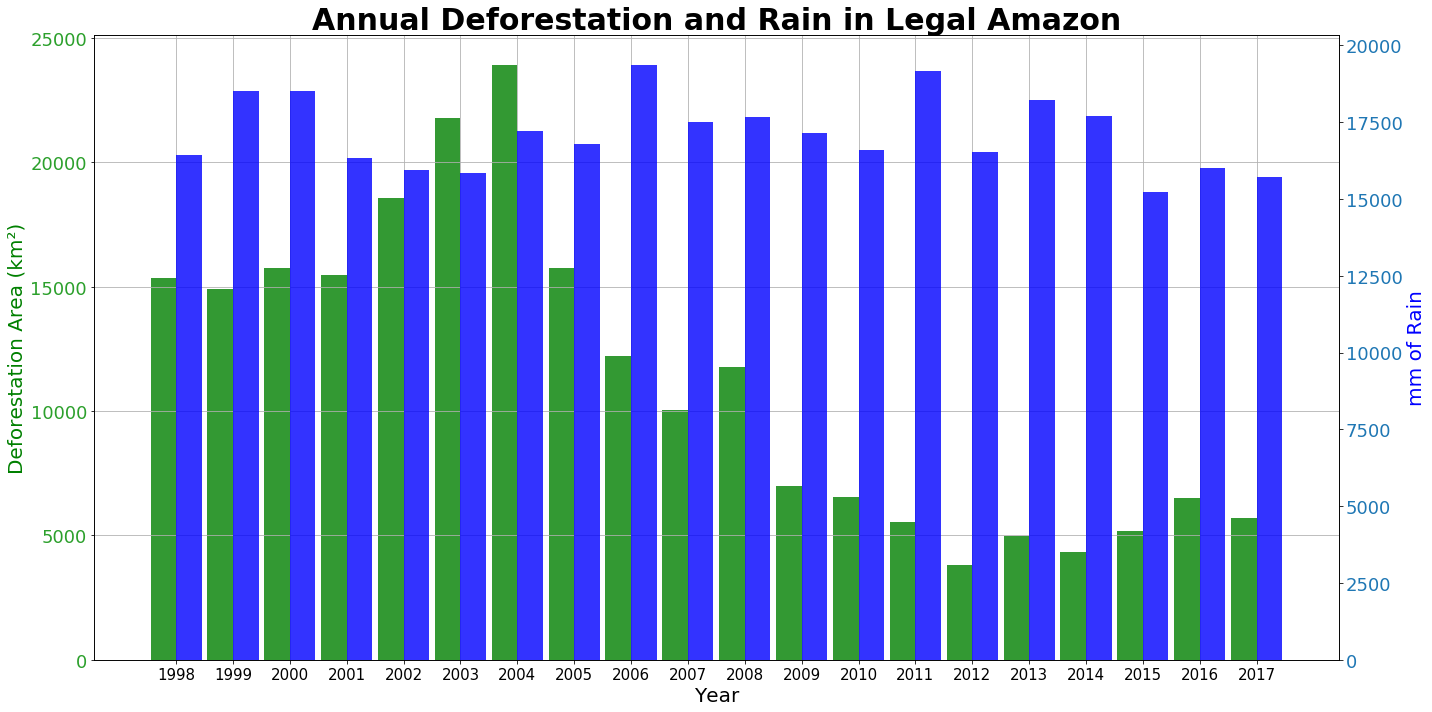

In [18]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in defo_rain_sum_year_df.iterrows():
    def_graph = ax1.bar(defo_rain_sum_year_df["year"][index], defo_rain_sum_year_df["square km"][index],  color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Deforestation and Rain in Legal Amazon", fontweight = "bold", fontsize = 30)
ax1.set_xlabel("Year",fontsize = 20)
ax1.set_ylabel("Deforestation Area (km²)",fontsize = 20, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green', labelsize = 18)

# Rain
ax2 = ax1.twinx()
for index, row in defo_rain_sum_year_df.iterrows():
    rain_graph = ax2.bar(defo_rain_sum_year_df["year"][index], defo_rain_sum_year_df["precipitation"][index],  color='b', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("mm of Rain",fontsize = 20, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue', labelsize = 18)

#other configurations
plt.xticks(tick_locations, x_axis_defo_rain, rotation=90)
ax1.tick_params(axis='x',labelsize = 15)
plt.tight_layout()
ax1.grid()

#save figure
plt.savefig("../output_data/images/defo_rain_year.png", dpi=fig.dpi)
plt.show()

In [17]:
# Group by state 
defo_rain_group_df = defo_rain_df.groupby(["state"])
defo_rain_sum_state_df = defo_rain_group_df.sum()
defo_rain_sum_state_df = pd.DataFrame(defo_rain_sum_state_df).reset_index()
defo_rain_sum_state_df = defo_rain_sum_state_df.drop(["year"], axis=1)

defo_rain_sum_state_df

,state,square km,precipitation
0,AC,8494.0,39679.3
1,AM,15038.0,46305.0
2,AP,646.0,49435.8
3,MA,14193.0,41610.1
4,MT,85688.0,27479.9
5,PA,93675.0,65892.9
6,RR,4643.0,35961.6
7,TO,2788.0,36078.6


In [21]:
# axis and ticks
x_axis_defo_rain = list(defo_rain_sum_state_df.state)
x_axis_defo_rain

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'TO']

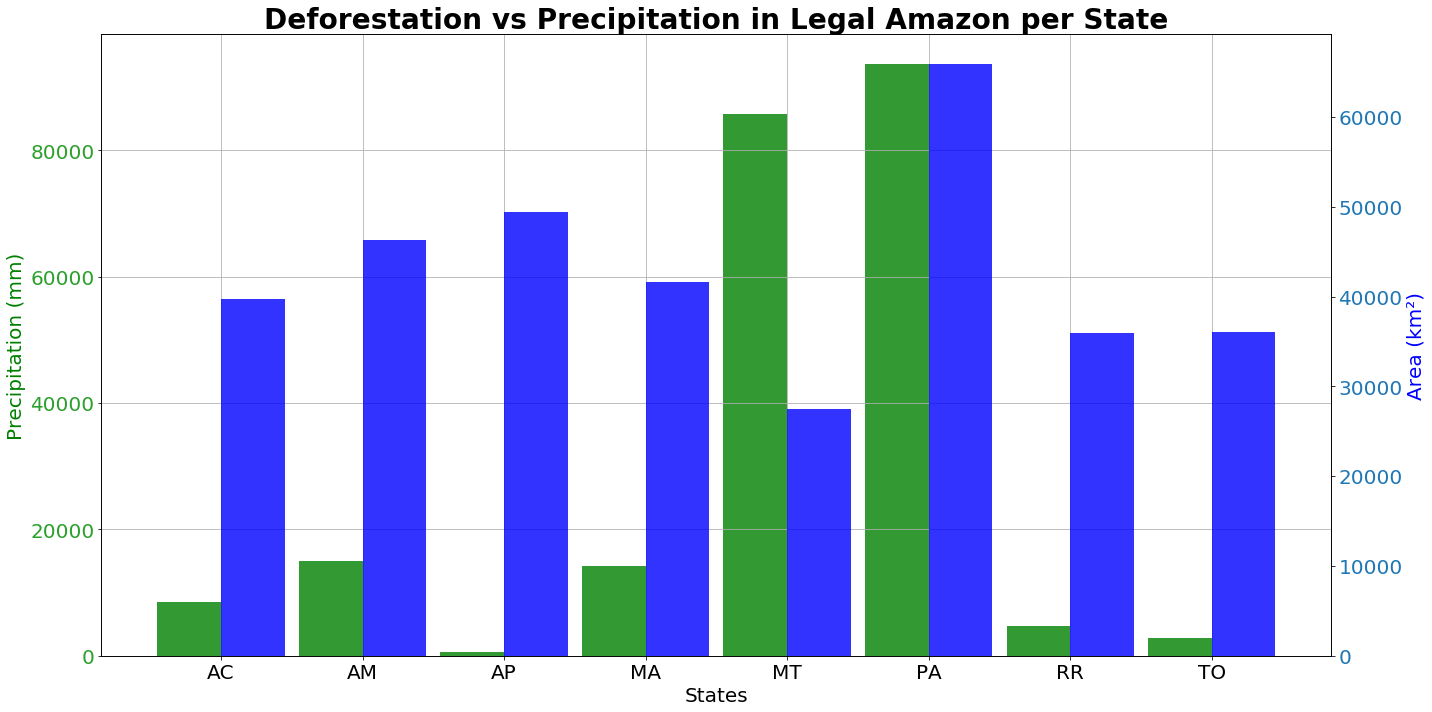

In [22]:
# Create 2 bar graph in the same fig for Deforestation and Fires by state in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))
# Deforestation
for index, row in defo_rain_sum_state_df.iterrows():
    def_graph = ax1.bar(defo_rain_sum_state_df["state"][index], defo_rain_sum_state_df["square km"][index],color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Deforestation vs Precipitation in Legal Amazon per State", fontweight = "bold", fontsize = 28)
ax1.set_xlabel("States",fontsize = 20)
ax1.set_ylabel("Precipitation (mm)",fontsize = 20, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green', labelsize = 20)
# Rain
ax2 = ax1.twinx()
for index, row in defo_rain_sum_state_df.iterrows():
    rain_graph = ax2.bar(defo_rain_sum_state_df["state"][index], defo_rain_sum_state_df["precipitation"][index],color='blue', alpha=.8,\
                        align="edge",width=+0.45)
ax2.set_ylabel("Area (km²)",fontsize = 20, color ='blue')
ax2.tick_params(axis='y',labelcolor='tab:blue', labelsize = 20)
#other configurations
plt.xticks(x_axis_defo_rain, rotation=90)
ax1.tick_params(axis='x',labelsize = 20)
plt.tight_layout()
ax1.grid()
#save figure
plt.savefig("../output_data/images/defo_rain_state.png", dpi=fig.dpi)
plt.show()

[[0.07879836]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.421
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              5.089
Date:                Mon, 25 May 2020   Prob (F-statistic):                      0.0587
Time:                        11:41:48   Log-Likelihood:                         -94.990
No. Observations:                   8   AIC:                                      192.0
Df Residuals:                       7   BIC:                                      192.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

C:\Users\joaog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


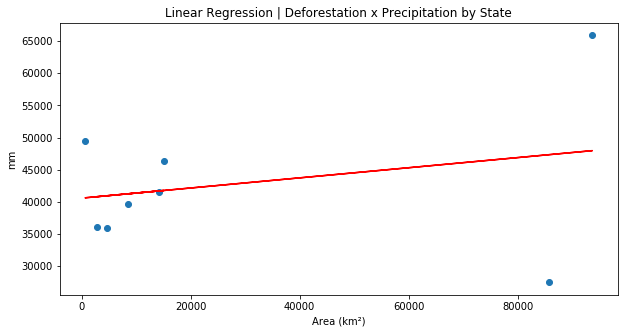

In [27]:
# Correlation Deforestation x Rain

fig, ax = plt.subplots(figsize=(10, 5))

X = defo_rain_sum_state_df['square km'].values.reshape(-1, 1)
Y = defo_rain_sum_state_df['precipitation'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)
# correlation matrices
#correlation coefficient

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
#plt.set_xlabel("mm",fontsize = 18, color ='b')


print(linear_regressor.coef_)
# Correlation Coefficient
# and R-square
defo_rain_sum_state_df.corr(method ='pearson')
model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())
plt.title("Linear Regression | Deforestation x Precipitation by State")
plt.xlabel("Area (km²)")
plt.ylabel("mm")
plt.savefig("../output_data/images/lr_def_rain.png", dpi=fig.dpi)
plt.show()
